In [1]:
#网络交互结构
#包括规则交互网络、小世界网络、无标度交互结构

#导入networkx包来构建图和网路
import itertools
import random
import math
import networkx as nx
from networkx.generators.classic import empty_graph, path_graph, complete_graph
import matplotlib.pyplot as plt #导入科学绘图包，命名mp
node_num = 15

In [2]:
#WS方法建立网络图
def WS_graph(node_num,k,p):
    G = nx.Graph()
    nodes = list(range(node_num)) 
    for j in range(1, k // 2+1):
        #建立规则图
        targets = nodes[j:] + nodes[0:j] 
        G.add_edges_from(zip(nodes,targets))

    for j in range(1, k // 2+1): 
        targets = nodes[j:] + nodes[0:j] 
        for u,v in zip(nodes,targets):
            if random.random() < p:
                #随机选择节点删除边
                w = random.choice(nodes)
                #判断是否有self-loop或者multiple edge
                while w == u or G.has_edge(u, w):
                    w = random.choice(nodes)
                else:
                    #随机化重连
                    G.remove_edge(u,v)
                    G.add_edge(u,w)
    return G
    

In [3]:
def NW_graph(node_num, k, p, seed=None):
    G=empty_graph(node_num)
    nlist = list(G.nodes)
    fromv = nlist
    #建立最近邻耦合网络
    for j in range(1, k // 2+1):
        tov = fromv[j:] + fromv[0:j] 
        for i in range(len(fromv)):
            G.add_edge(fromv[i], tov[i])
    
    #随机化加边
    e = G.edges()
    for (u, v) in e:
        if random.random() < p:
            w = random.choice(nlist)
            while w == u or G.has_edge(u, w):
                w = random.choice(nlist)
            else:
                G.add_edge(u,w)
    return G

In [4]:
def BA_graph(node_num,m):
    G=empty_graph(m)
    
    targets=list(range(m))
    repeated_nodes=[]
    source=m
    
    while source<node_num:
        #新节点以概率和已有边的节点相连
        G.add_edges_from(zip([source]*m,targets))
        repeated_nodes.extend(targets)
        repeated_nodes.extend([source]*m)
        temp_targets=set()
        #随机选取子集
        while len(temp_targets)<m:
            x=random.choice(repeated_nodes)
            temp_targets.add(x)
        targets = temp_targets
        #每次加边，图中原有的source边都+1
        source += 1
    return G

In [5]:
#规则交互结构

In [6]:
#全局耦合网络Global Coupled Network
#规则网路可以利用随机网络来构建，即将重连概率改为0
p_regular = 0.0

平均路径长度:  1.0
聚类系数:  {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0, 10: 1.0, 11: 1.0, 12: 1.0, 13: 1.0, 14: 1.0}


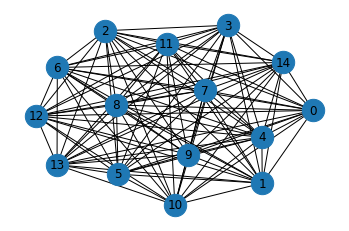

In [7]:
#全局耦合网络任意两节点间均有边相连
k_gcn = node_num-1
global_coupled_network = WS_graph(node_num,k=k_gcn,p=p_regular)
fig,ax = plt.subplots()
nx.draw(global_coupled_network,node_size = 500, with_labels = True)
print("平均路径长度: ", nx.average_shortest_path_length(global_coupled_network))
print("聚类系数: ",nx.clustering(global_coupled_network))

平均路径长度:  2.2857142857142856
node_num / 2*k_nncn:  1.875
聚类系数:  {0: 0.5, 1: 0.5, 2: 0.5, 3: 0.5, 4: 0.5, 5: 0.5, 6: 0.5, 7: 0.5, 8: 0.5, 9: 0.5, 10: 0.5, 11: 0.5, 12: 0.5, 13: 0.5, 14: 0.5}


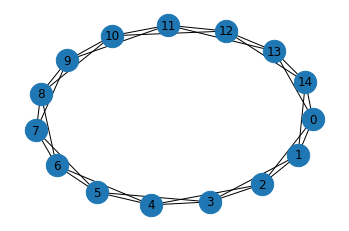

In [8]:
#最近邻耦合网络Nearest-neighbor Coupled Network
k_nncn = 4
nearest_neighbor_coupled_network = WS_graph(node_num,k=k_nncn,p=p_regular)
fig,ax = plt.subplots()
nx.draw(nearest_neighbor_coupled_network,node_size = 500, with_labels = True)
print("平均路径长度: ", nx.average_shortest_path_length(nearest_neighbor_coupled_network))
print("node_num / 2*k_nncn: ",node_num/8)
print("聚类系数: ",nx.clustering(nearest_neighbor_coupled_network))

平均路径长度:  1.875
聚类系数:  {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0}


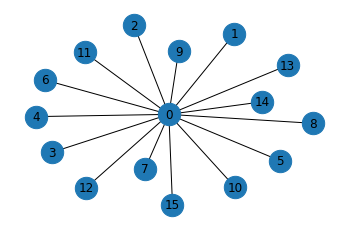

In [9]:
#星型网络
star_network = nx.star_graph(node_num)
fig,ax = plt.subplots()
nx.draw(star_network,node_size = 500, with_labels = True)
#fig.show()
print("平均路径长度: ", nx.average_shortest_path_length(star_network))
print("聚类系数: ",nx.clustering(star_network))

平均路径长度:  1.4952380952380953
聚类系数:  {0: 0.5357142857142857, 1: 0.35714285714285715, 2: 0.6, 3: 0.5357142857142857, 4: 0.4666666666666667, 5: 0.6666666666666666, 6: 0.6666666666666666, 7: 0.5555555555555556, 8: 0.6, 9: 0.5333333333333333, 10: 0.5, 11: 0.8, 12: 0.5714285714285714, 13: 0.509090909090909, 14: 0.5}


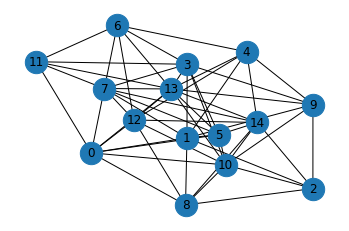

In [10]:
#随机网络 Random Network
#任意两点间以一定概率p建立交互链接
p_rn = 0.5
random_network = nx.gnp_random_graph(node_num,p=p_rn)
fig,ax = plt.subplots()
nx.draw(random_network,node_size = 500, with_labels = True)
print("平均路径长度: ", nx.average_shortest_path_length(random_network))
print("聚类系数: ",nx.clustering(random_network))

In [13]:
#WS小世界网络
k_ws = 5
p_ws = 5

平均路径长度:  1.9619047619047618
聚类系数:  {0: 0.26666666666666666, 1: 0.3333333333333333, 2: 0.4, 3: 0, 4: 0.3333333333333333, 5: 0, 6: 0, 7: 0.3333333333333333, 8: 1.0, 9: 0.3333333333333333, 10: 0.16666666666666666, 11: 0.4, 12: 0.16666666666666666, 13: 1.0, 14: 0}


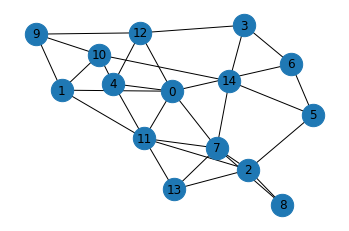

In [14]:
#WS小世界网络
WS_network = WS_graph(node_num,k=k_ws,p=p_ws)
fig,ax = plt.subplots()
nx.draw(WS_network,node_size = 500, with_labels = True)
print("平均路径长度: ", nx.average_shortest_path_length(WS_network))
print("聚类系数: ",nx.clustering(WS_network))

平均路径长度:  1.438095238095238
聚类系数:  {0: 0.5, 1: 0.5357142857142857, 2: 0.5357142857142857, 3: 0.6, 4: 0.6666666666666666, 5: 0.6190476190476191, 6: 0.5555555555555556, 7: 0.4642857142857143, 8: 0.5454545454545454, 9: 0.5714285714285714, 10: 0.6111111111111112, 11: 0.6666666666666666, 12: 0.5357142857142857, 13: 0.5714285714285714, 14: 0.5333333333333333}


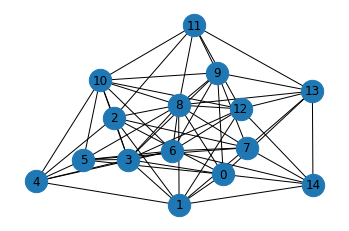

In [15]:
#NW小世界网络
NW_network = NW_graph(node_num,k=k_ws,p=p_ws)
fig,ax = plt.subplots()
nx.draw(NW_network,node_size = 500, with_labels = True)
print("平均路径长度: ", nx.average_shortest_path_length(NW_network))
print("聚类系数: ",nx.clustering(NW_network))

平均路径长度:  2.742857142857143
聚类系数:  {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0}


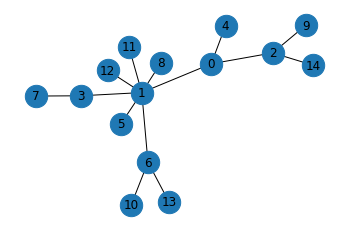

In [17]:
#无标度网络
m = 1
BA_network = BA_graph(node_num,m)
fig,ax = plt.subplots()
nx.draw(BA_network,node_size = 500, with_labels = True)
print("平均路径长度: ", nx.average_shortest_path_length(BA_network))
print("聚类系数: ",nx.clustering(BA_network))